In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
days = [-2, -1, 0]
round_number = 1 
day_prices_dfs = []

for day in days:
    file_path = f"../data/round1/trades_round_{round_number}_day_{day}.csv"
    day_price_df = pd.read_csv(file_path, delimiter=";").drop(columns=["buyer", "seller", "currency"])
    day_prices_dfs.append(day_price_df)

day_prices_dfs

[      timestamp            symbol   price  quantity
 0             0              KELP  2002.0         1
 1             0  RAINFOREST_RESIN  9996.0         1
 2             0  RAINFOREST_RESIN  9996.0         1
 3             0         SQUID_INK  2002.0         1
 4           100              KELP  2002.0         6
 ...         ...               ...     ...       ...
 8393     998900              KELP  2029.0         1
 8394     998900         SQUID_INK  2001.0         1
 8395     999000              KELP  2030.0         9
 8396     999000         SQUID_INK  2002.0         9
 8397     999800  RAINFOREST_RESIN  9998.0         1
 
 [8398 rows x 4 columns],
       timestamp            symbol    price  quantity
 0             0              KELP   2029.0        13
 1             0              KELP   2029.0         1
 2             0  RAINFOREST_RESIN  10004.0         1
 3             0         SQUID_INK   2006.0        13
 4             0         SQUID_INK   2006.0         1
 ...        

In [3]:
rainforest_resin_prices_list = []

for day_price_df in day_prices_dfs:
    rainforest_resin_prices = day_price_df[day_price_df["symbol"] == "RAINFOREST_RESIN"].drop(columns=["symbol"])
    rainforest_resin_prices_list.append(rainforest_resin_prices)

rainforest_resin_prices_list

[      timestamp    price  quantity
 1             0   9996.0         1
 2             0   9996.0         1
 11         1500  10004.0         1
 21         2500   9998.0         1
 24         3200   9996.0         1
 ...         ...      ...       ...
 8376     996700  10004.0         1
 8378     996800   9996.0         2
 8380     997000  10004.0         1
 8385     997700   9996.0         1
 8397     999800   9998.0         1
 
 [2450 rows x 3 columns],
       timestamp    price  quantity
 2             0  10004.0         1
 5          1100   9996.0         2
 7          1700  10002.0         1
 9          1800  10002.0         1
 12         2000   9998.0         1
 ...         ...      ...       ...
 8261     995000  10002.0         1
 8280     996500  10002.0         1
 8289     997600  10004.0         2
 8290     997600  10004.0         8
 8305     999600   9998.0         1
 
 [2388 rows x 3 columns],
       timestamp    price  quantity
 0           100  10002.0         1
 2      

10003.958851062418 9996.114618325339


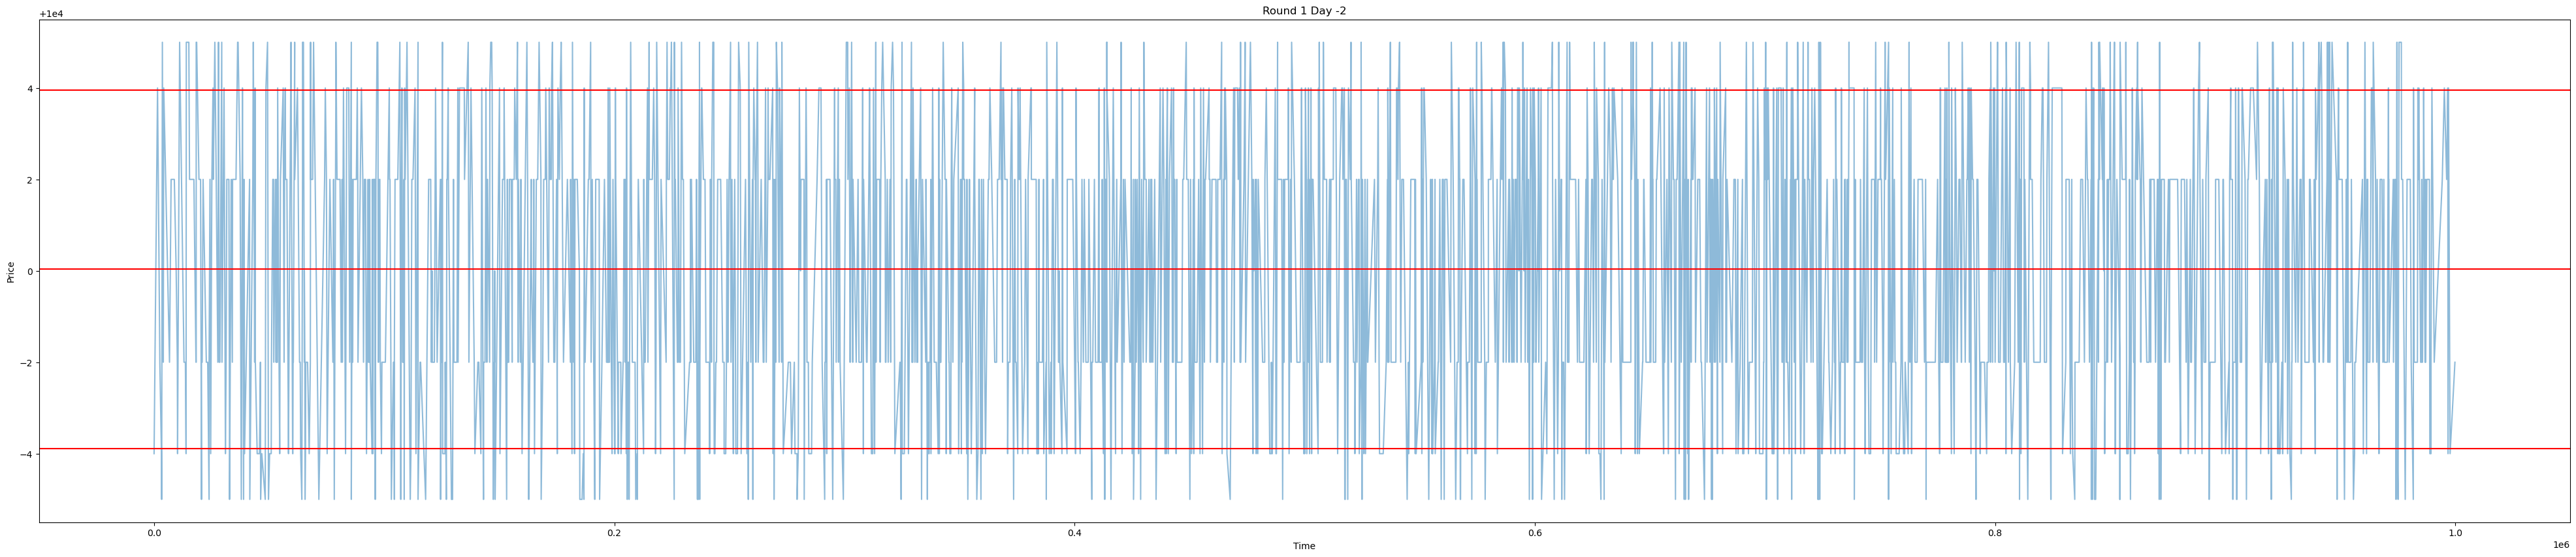

10003.874788642384 9995.918343685924


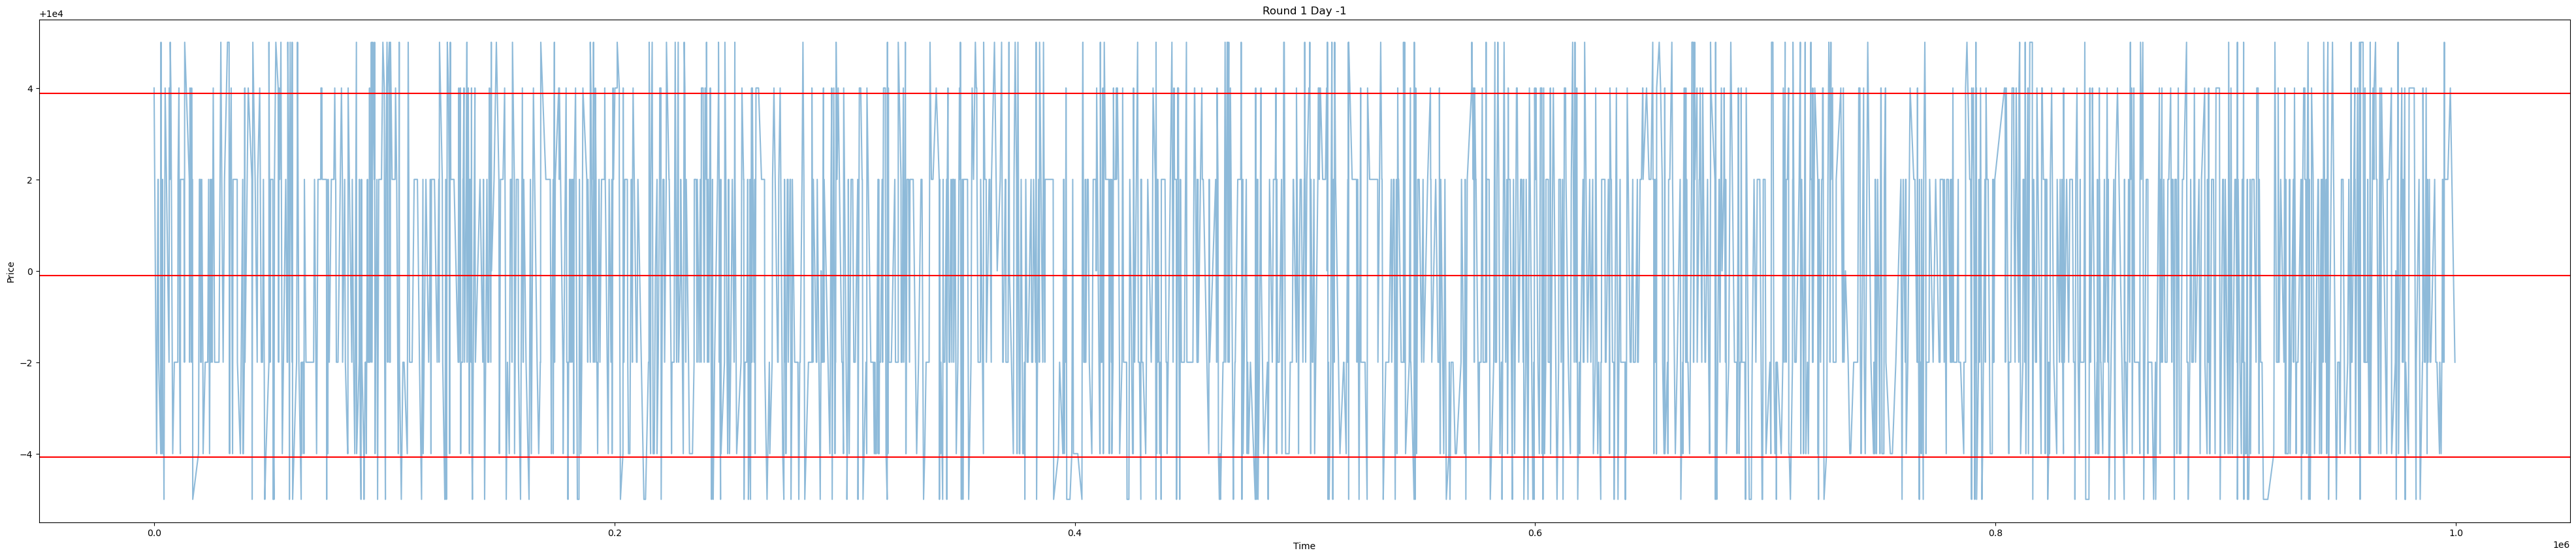

10003.884294210373 9996.05671119054


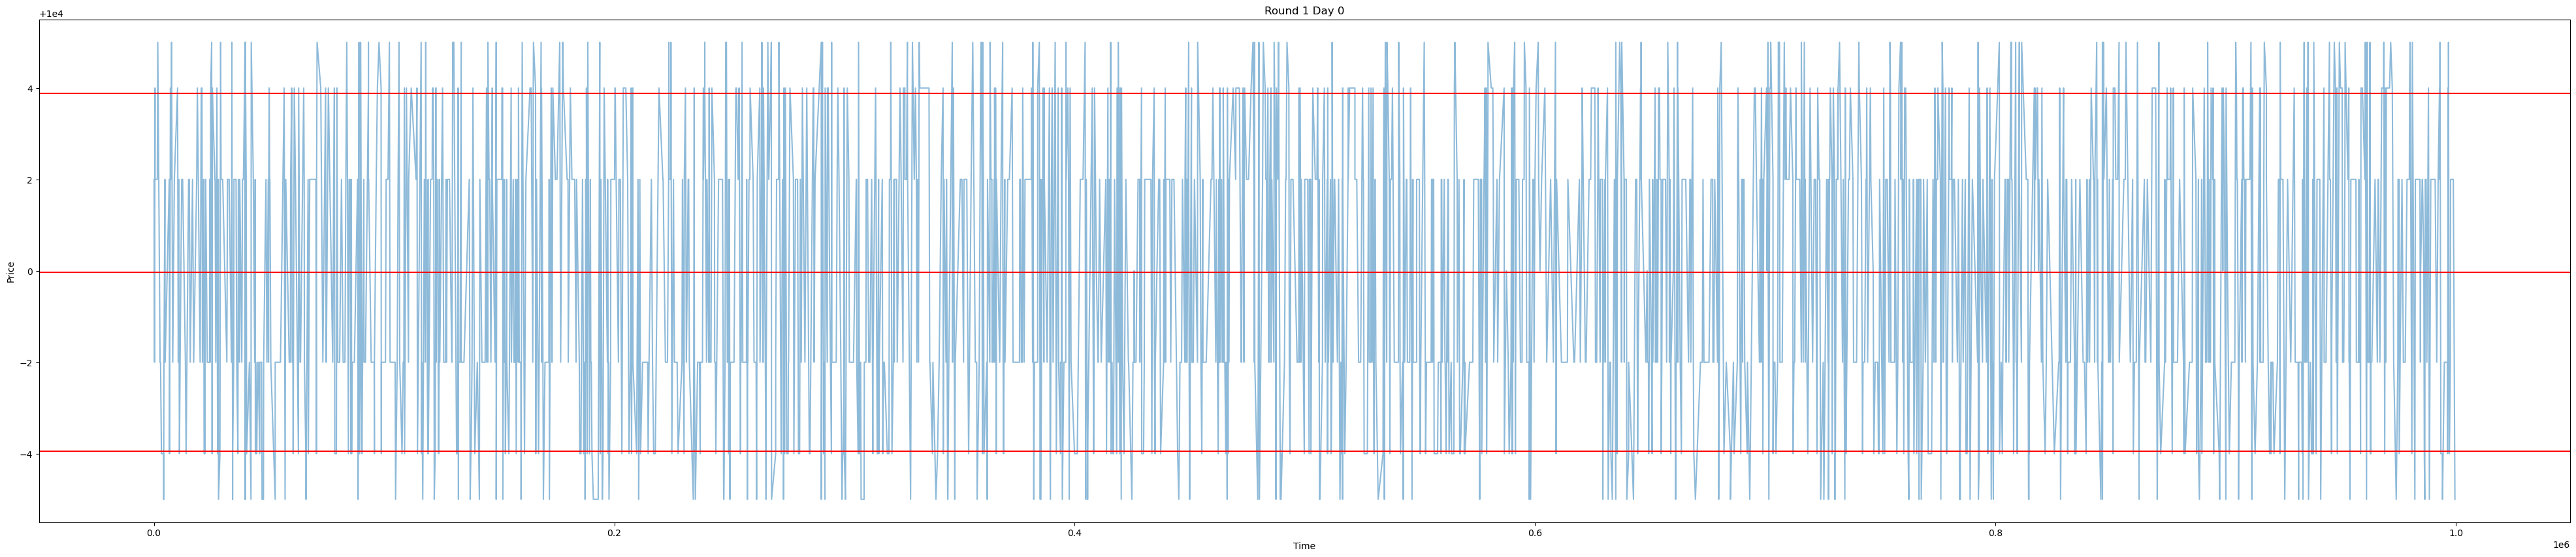

In [4]:
for rainforest_resin_prices, day in zip(rainforest_resin_prices_list, days):
    mean = rainforest_resin_prices.mean()["price"]
    std = rainforest_resin_prices.std()["price"]
    paramter = 1.25
    upper_bound = mean + paramter * std 
    lower_bound = mean - paramter * std 
    print(upper_bound, lower_bound)
    plt.figure(figsize=(50,10))
    plt.plot(rainforest_resin_prices["timestamp"], rainforest_resin_prices["price"], alpha=0.5)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title(f"Round {round_number} Day {day}")
    plt.axhline(y=mean, color='r', linestyle='-')
    plt.axhline(y=upper_bound, color='r', linestyle='-')
    plt.axhline(y=lower_bound, color='r', linestyle='-')
    plt.show()

In [5]:
for rainforest_resin_prices, day in zip(rainforest_resin_prices_list, days):
    rainforest_resin_prices["sell signal"] = rainforest_resin_prices["price"] > upper_bound
    rainforest_resin_prices["buy signal"] = rainforest_resin_prices["price"] < lower_bound
    number_of_sell_signals = rainforest_resin_prices["sell signal"].sum()
    number_of_buy_signals = rainforest_resin_prices["buy signal"].sum()
    print(f"Round {round_number} Day {day} Results ")
    print(f"Number of Buy Signals: {number_of_buy_signals} and Number of Sell Signals: {number_of_sell_signals}")
    amount = 0
    shares = 0 
    price = 0 

    for i, row in rainforest_resin_prices.iterrows():
        if row["sell signal"]:
            shares -= 1 
            amount += row["price"] 
        if row["buy signal"]:
            shares += 1
            amount -= row["price"]

        price = row["price"]
    print(f"Ending Price ${price}")
    pl = amount + shares * price 
    print(f"P/L : ${pl}\n")

Round 1 Day -2 Results 
Number of Buy Signals: 478 and Number of Sell Signals: 500
Ending Price $9998.0
P/L : $4254.0

Round 1 Day -1 Results 
Number of Buy Signals: 523 and Number of Sell Signals: 477
Ending Price $9998.0
P/L : $4211.0

Round 1 Day 0 Results 
Number of Buy Signals: 482 and Number of Sell Signals: 484
Ending Price $9995.0
P/L : $4147.0

